## A Basic Quantitative Risk Analysis of the FTSEMIB, Italy’s Main Equity Index (1998–2025)
### *Written by Matteo Cunsolo*

In [334]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

##### ***The csv file containing all the data has been downloaded from Investing.com and renamed to FTSEMIB.csv***
##### ***https://www.investing.com/indices/it-mib-40-historical-data***

In [293]:
prices=pd.read_csv("FTSEMIB.csv"
                  ,header=0, index_col=0, parse_dates=True,
                    na_values=-99.99)
prices

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-12-01,"43,455.00","43,168.13","43,716.00","42,857.94",2.17B,0.23%
2025-11-01,"43,357.01","43,143.45","45,071.84","42,018.31",8.43B,0.42%
2025-10-01,"43,175.32","42,686.01","43,540.41","41,360.08",11.18B,1.05%
2025-09-01,"42,725.32","42,378.37","43,111.43","41,468.18",8.64B,1.25%
2025-08-01,"42,196.20","40,682.47","43,564.12","39,714.43",8.47B,2.95%
...,...,...,...,...,...,...
1998-05-01,"34,396.41","34,218.28","35,838.54","32,983.56",NaN,4.98%
1998-04-01,"32,763.95","35,582.33","37,436.84","31,136.37",NaN,-5.16%
1998-03-01,"34,545.26","29,298.93","34,545.26","29,262.33",NaN,21.03%


**More about the FTSE MIB:**
A very brief summary of its history.

- **On December 1992:** The original index, **COMIT 30**, was launched by Banca Commerciale Italiana (Which is now called "Intesa San Paolo").
- **On October 1994:** Borsa Italiana took over, renaming it **MIB 30**.
- **On June 2003: S&P/MIB** was launched in parallel.
- **On November 2003:** **S&P/MIB** had replaced MIB 30 as the benchmark.
- **On June 2009:** **S&P/MIB** was finally replaced by the current **FTSE MIB**, with now 40, instead of 30 companies.
  
In short, although the data and analysis are described as referring to the **FTSE MIB**, they actually cover also the earlier **MIB 30** index. (**COMIT 30** data is not included in the dataset, as it starts from 1998).

Anyways, enough with the talking, let's start:

# 1) DATA CLEAN-UP AND PRICE PLOTTING
##### The downloaded data it's unfortunately not directly readable as a float, due to the presence of some characters, such as "," inside  the values. 
##### Right now we risk that python will recognize all the values as strings, and we don't want that.
##### We also want to keep the column Change % but we divide it by 100 to get the raw percentage
*Let's start:*

In [295]:
# Firstly we have to convert all columns that should be numbers
cols_to_convert = ['Price', 'Open', 'High', 'Low', 'Change %']
for col in cols_to_convert:
    prices[col] = pd.to_numeric(prices[col].str.replace(',', '').str.replace('%',''), errors='coerce')
    
#We are now dividing the column "Change %" by 100
prices['Change %']=prices['Change %']/100.00

#And renaming all the columns
prices.columns = ['Price', 'Open', 'High', 'Low', 'Volume', 'Return']


##### Now if we again look at the prices we can se that we obtained what we wanted:

In [296]:
prices.head()

,Price,Open,High,Low,Volume,Return
Date,,,,,,
2025-12-01,43455.00,43168.13,43716.00,42857.94,2.17B,0.0023
2025-11-01,43357.01,43143.45,45071.84,42018.31,8.43B,0.0042
2025-10-01,43175.32,42686.01,43540.41,41360.08,11.18B,0.0105
2025-09-01,42725.32,42378.37,43111.43,41468.18,8.64B,0.0125
2025-08-01,42196.20,40682.47,43564.12,39714.43,8.47B,0.0295


### Now we plot just the closing prices for a quick line graph of the performance of FTSEMIB since the oldest date available:

<Axes: title={'center': 'Price Over Time'}, xlabel='Date'>

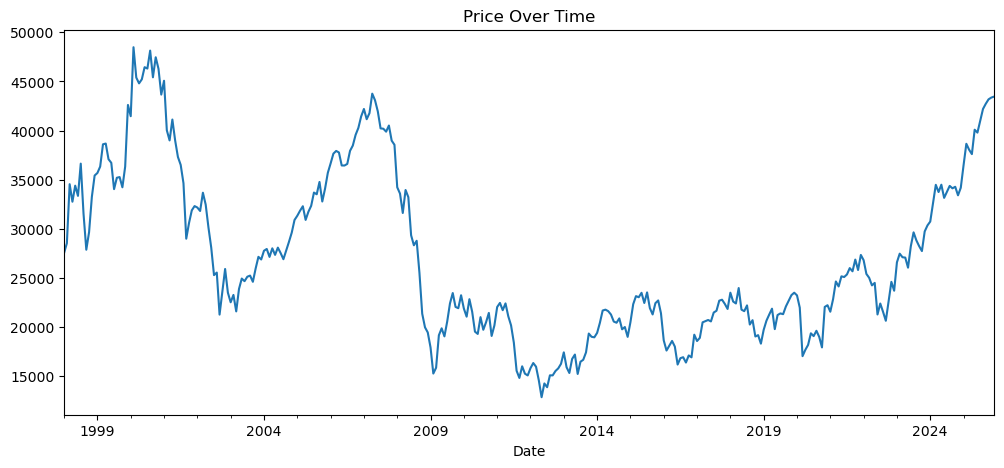

In [297]:
prices['Price'].plot.line(title='Price Over Time', figsize=(12,5))

# 2) Historical Monthly Returns (up to December 2025)

 We already have the returns on the csv file, but we are going to compute it anyway to see if it matches


In [298]:
returns = - prices[['Price']].pct_change().shift(-1)  # Double brackets create a DataFrame, shift because of N.As for the last date 
# as there is no date after to compare it to)
# there is a - in front of prices because the returns would otherwise be flipped as pct_change calculates (old- new)/new 
returns.columns = ['Return']
returns.head()

,Return
Date,
2025-12-01,0.002255
2025-11-01,0.004191
2025-10-01,0.010423
2025-09-01,0.012384
2025-08-01,0.028640


In [299]:
#Checking if the returns match or not
same = np.allclose(prices['Return'], returns['Return'])
print(same)

False


### We have found out that the returns don't match to the one we have on the csv, the reason is obvious by looking at the return.head() : the values are approximated
#### We are now going to use our calculated values to advance in further analysis due to the superior decimal precision
##### We substitute the values in the colon Return with the Returns that we have just calculated:

In [300]:
prices['Return']= returns['Return']

#### We now have a more precise Returns column:

In [301]:
prices

,Price,Open,High,Low,Volume,Return
Date,,,,,,
2025-12-01,43455.00,43168.13,43716.00,42857.94,2.17B,0.002255
2025-11-01,43357.01,43143.45,45071.84,42018.31,8.43B,0.004191
2025-10-01,43175.32,42686.01,43540.41,41360.08,11.18B,0.010423
2025-09-01,42725.32,42378.37,43111.43,41468.18,8.64B,0.012384
2025-08-01,42196.20,40682.47,43564.12,39714.43,8.47B,0.028640
...,...,...,...,...,...,...
1998-05-01,34396.41,34218.28,35838.54,32983.56,NaN,0.047460
1998-04-01,32763.95,35582.33,37436.84,31136.37,NaN,-0.054368
1998-03-01,34545.26,29298.93,34545.26,29262.33,NaN,0.173766


#### Quick plot of the returns for visual clarification:

<Axes: title={'center': 'Monthly Returns over the years'}, xlabel='Date'>

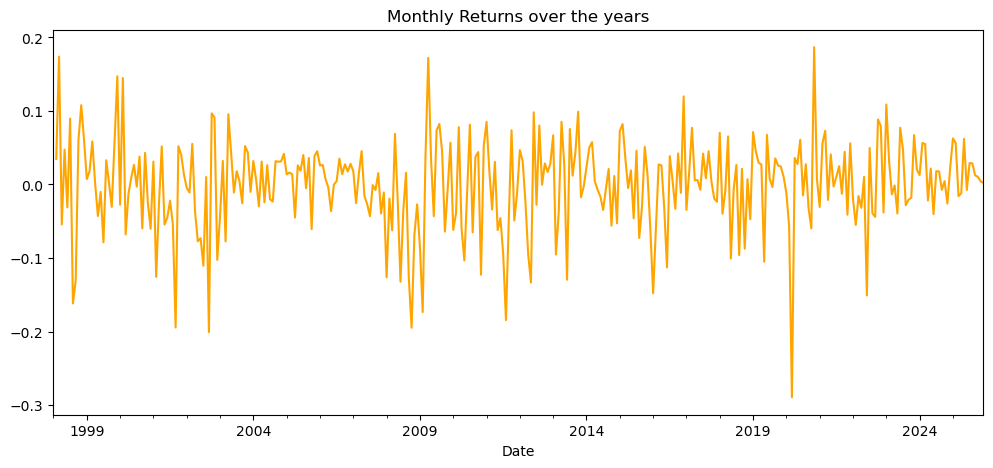

In [302]:
prices['Return'].plot.line(title="Monthly Returns over the years", color="orange", figsize=(12,5))

In [303]:
print("The HIGHEST return ever was --> ",max(prices["Return"])," and was registered on ",prices["Return"].idxmax())
print("The LOWEST return ever was --> ",min(prices["Return"])," and was registered on ",prices["Return"].idxmin())

The HIGHEST return ever was -->  0.18665852559587104  and was registered on  2020-11-01 00:00:00
The LOWEST return ever was -->  -0.2893253978959518  and was registered on  2020-03-01 00:00:00


### So we have found out that FTSEMIB:
- Had its Best Monthly Return on _**November 2020**_ of precisely _**+18,67%**_
- Had its Worst Montlhy Return on _**March 2020**_ with a heavy _**-28,93%**_


# 3) Risk Analysis: Volatility, Risk-Return Ratio, Sharpe Ratio, Drawdown


#### _Annualized Returns_

In [304]:
n_months=prices.shape[0] # total number of months in the csv prices
annualized_returns=np.prod(prices['Return']+1)**(12/n_months) - 1 
print(annualized_returns)

-0.029730942660386117


- We have found Annualized Returns of **_-2,97%_** which tells us that the FTSEMIB over the sample period returned a geometric average return of **_-2,97% per year_**

#### _Annualized Volatility_

In [306]:
annualized_volatility=prices['Return'].std()*np.sqrt(12)
print(annualized_volatility)

0.21509798557367912


- We have found an annualized volatility of **_21,51%_** which tells us that assuming a normal distribution (and we will have more in depth analysis later to check this) FTSEMIB's returns can fall between $\mathbf{+21.51\%}$ or $\mathbf{-21.51\%}$ of its expected return over a one-year period.

#### _Risk-Reward Ratio_

In [307]:
risk_reward=annualized_returns/annualized_volatility
print(risk_reward)

-0.13822046069418978


- We found a Risk-Reward Ratio of **_-0,138_** which reflects the negative annualized returns that we had found before

#### _Sharpe Ratio_

The Sharpe Ratio is defined as followed: **$$S = \frac{R_p - R_f}{\sigma_p}$$** Where:

- $R_p$: Portfolio Risk Adjusted Return (Annualized Return)
- $R_f$: Risk-Free Rate (We will use the 10 year yield of Italian Goverment Bonds, as FTSEMIB is based in IT)
- $R_p - R_f$: Excess Return (The Numerator)
- $\sigma_p$: Standard Deviation of Portfolio Returns

We use the **Sharpe Ratio** number as an indicator on how well the investment is compensating the investor for the risk taken



### Focusing on finding our $R_f$
We first start by importing our csv with Italy's 10Y bonds YIELD from Fred St.Louis website (https://fred.stlouisfed.org/series/IRLTLT01ITM156N), cleaning the data and reorganizing the columns exactly as we have done previously with the historical data of FTSEMIB. This data contains the annual yield of the bonds on a monthly basis.

In [308]:
bonds_y=pd.read_csv("ITALY10YBONDSYIELDS.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99,)
## We are now filtering from 1998 inwards because the FTSEMIB dataset starts from the same date and we want to have coherent values
bonds_y_filtered = bonds_y[bonds_y.index >= '1998-01-01']
bonds_y=bonds_y_filtered
bonds_y

,IRLTLT01ITM156N
observation_date,
1998-01-01,5.434
1998-02-01,5.375
1998-03-01,5.198
1998-04-01,5.146
1998-05-01,5.208
...,...
2025-06-01,3.501
2025-07-01,3.537
2025-08-01,3.539


***Cleaning the data as done before:***

In [309]:
bonds_y.index.name = "Date"
bonds_y.columns=["Yield"]
bonds_y

,Yield
Date,
1998-01-01,5.434
1998-02-01,5.375
1998-03-01,5.198
1998-04-01,5.146
1998-05-01,5.208
...,...
2025-06-01,3.501
2025-07-01,3.537
2025-08-01,3.539


***We can now compute the average of the annuals bond yield that we have which will be our risk free rate for this application:***

In [310]:
risk_free_rate=bonds_y["Yield"].mean()/100
print("Our risk free rate will be -> ",risk_free_rate)

Our risk free rate will be ->  0.03706488023952096


### **So we have computed a risk free rate of _3,71%_**

#### We can plot the bonds yield curve to see how it changed during the years

<Axes: title={'center': 'Bonds Yield (Risk Free Rate) during the years'}, xlabel='Date'>

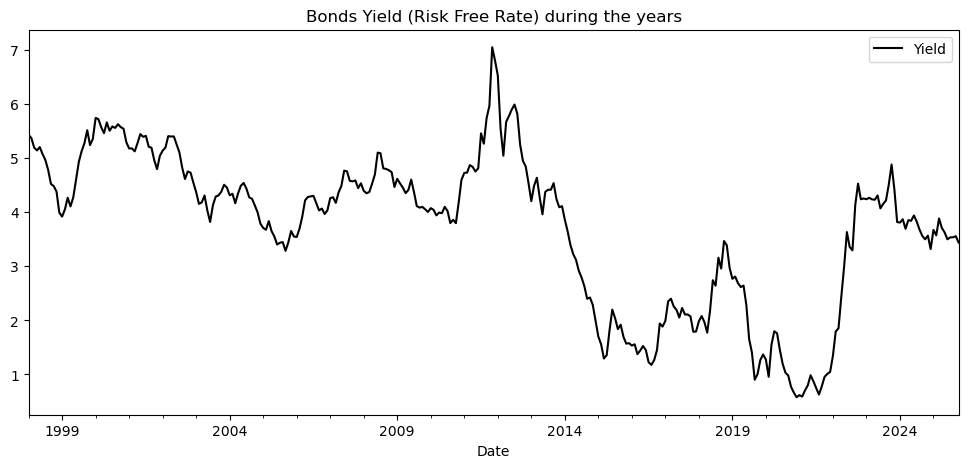

In [311]:
bonds_y.plot.line(color="black", title="Bonds Yield (Risk Free Rate) during the years", figsize=(12,5))

#### We can also take a look at the Italian 10Y bonds prices to have more insights:

In [312]:
bonds=pd.read_csv("ITALY10YBONDS.csv", header=0, index_col=0, parse_dates=True,
                    na_values=-99.99)
bonds

,Price,Open,High,Low,Change %
Date,,,,,
2025-12-01,3.539,3.467,3.543,3.433,3.97%
2025-11-01,3.404,3.405,3.473,3.368,0.60%
2025-10-01,3.384,3.549,3.568,3.344,-5.06%
2025-09-01,3.564,3.634,3.709,3.480,-1.40%
2025-08-01,3.615,3.538,3.617,3.451,2.23%
...,...,...,...,...,...
1998-05-01,5.146,5.146,5.146,5.146,-1.92%
1998-04-01,5.247,5.247,5.247,5.247,1.12%
1998-03-01,5.189,5.189,5.189,5.189,-2.85%


***Cleaning the data as done before:***

In [313]:
#Convert all columns that should be numbers
bonds['Change %'] = pd.to_numeric(bonds['Change %'].str.replace('%',''), errors='coerce')
    
#Dividing the column "Change %" by 100
bonds['Change %']=bonds['Change %']/100.00

#Renaming all the columns
bonds.columns = ['Price', 'Open', 'High', 'Low', 'Return']

b_returns = - bonds[['Price']].pct_change().shift(-1)  # double brackets create a DataFrame
# there is a - in front of prices because the returns would otherwise be flipped as pct_change calculates (old- new)/new 
b_returns.columns = ['Return']

#final data on which we can work:
bonds

,Price,Open,High,Low,Return
Date,,,,,
2025-12-01,3.539,3.467,3.543,3.433,0.0397
2025-11-01,3.404,3.405,3.473,3.368,0.0060
2025-10-01,3.384,3.549,3.568,3.344,-0.0506
2025-09-01,3.564,3.634,3.709,3.480,-0.0140
2025-08-01,3.615,3.538,3.617,3.451,0.0223
...,...,...,...,...,...
1998-05-01,5.146,5.146,5.146,5.146,-0.0192
1998-04-01,5.247,5.247,5.247,5.247,0.0112
1998-03-01,5.189,5.189,5.189,5.189,-0.0285


#### Now we will compute the annualized return of the prices of the bonds:

In [314]:
#the procedure is exactly the same as for the index 
bn_months=bonds.shape[0] # total number of months in the csv prices
bond_annualized_returns=np.prod(bonds['Return']+1)**(12/bn_months) - 1 
print(bond_annualized_returns)

-0.01648231021215918


We find that the **prices** of the bonds have lost an average of **_-1,64%_** a year.

#### And finally we can see the graph of the prices and the price change:

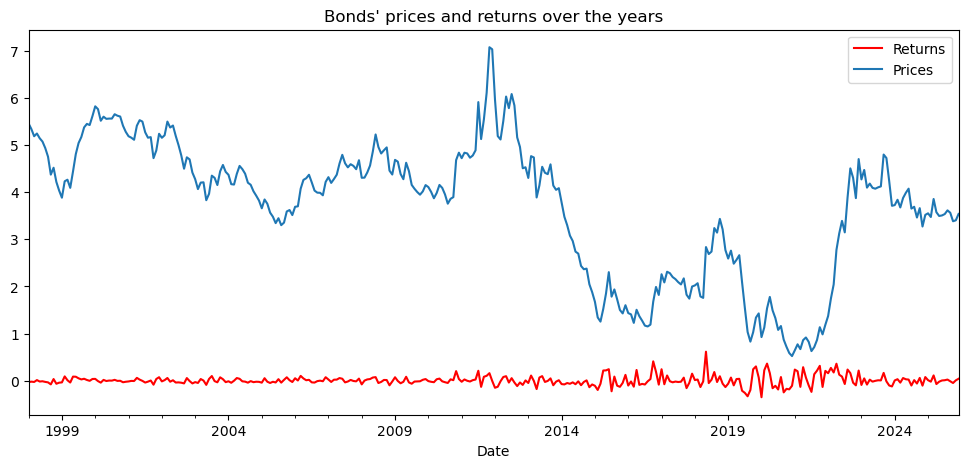

In [315]:
bonds['Return'].plot.line(color="red", title="Bonds' prices and returns over the years", label="Returns", figsize=(12,5))
bonds['Price'].plot.line(label="Prices")
plt.legend()

In [ ]:
Which is an exact copy of the trends of the bonds yields

#### Back to our ***Sharpe Ratio*** **$$S = \frac{R_p - R_f}{\sigma_p}$$**

In [316]:
#We now have the risk free rate so we can compute the sharpe ratio
risk_free_rate
annualized_returns
annualized_volatility
Sharpe_Ratio=(annualized_returns-risk_free_rate)/annualized_volatility
print("The Sharpe Ratio is --> ",Sharpe_Ratio)

The Sharpe Ratio is -->  -0.31053671991282783


#### We have now found out that the sharpe ratio is ***-0,31***

#### So we have found out that FTSEMIB:
- Has performed ***worse than the 10 year yield italian government bond*** (our risk free rate), because the ratio is negative
- Has a negative sharpe ratio which indicates that ***unfortunately the risk for investments was not compensated by the returns***

Let's move to the last part of this second section


#### _Drawdown_

##### To compute the drawdown, which is the wealth value as a percentage of the previous peak (in short, the maximum amount of money that you could have lost by buying at the top and selling at the bottom, pricewise)
1) Compute Wealth index (value of a portfolio as it compounds over time)
2) Compute previous peaks
3) Compute drawdown 

In [318]:
# 1) Let's create a portfolio of 10000 eur and see how it compounds over the years
wealth_index= 10000 *(1+prices['Return']).cumprod()
wealth_index.head()

Date
2025-12-01    10022.549764
2025-11-01    10064.549825
2025-10-01    10169.448814
2025-09-01    10295.389562
2025-08-01    10590.252162
Name: Return, dtype: float64

Let's plot our portfolio during the years, supposing that we have invested on the first available date, that is 1 January 1998 and that we didn't invest anything more afterwards:

<Axes: title={'center': 'Portfolio Value over Time'}, xlabel='Date'>

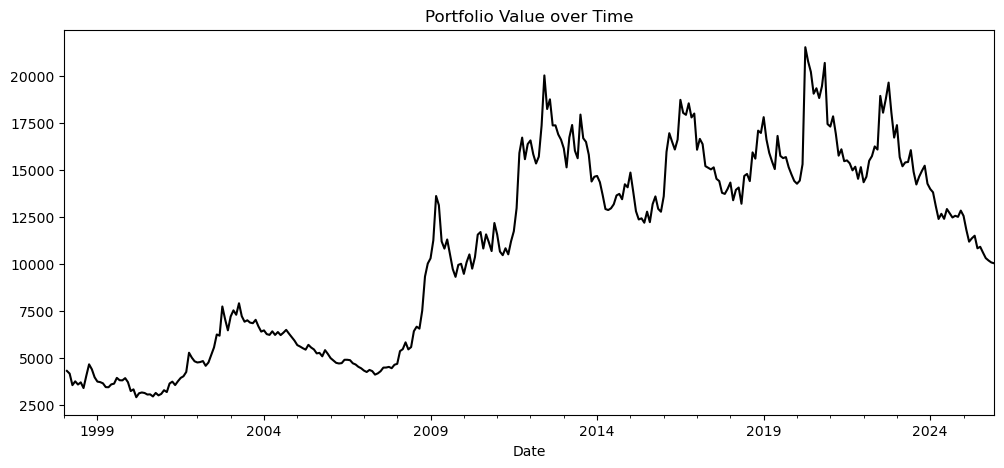

In [258]:
wealth_index.plot(title="Portfolio Value over Time", color="black", figsize=(12,5))

#### And this is the graphical representation of our portfolio during the years in the sample period.

#### Let's now compute the previous peaks and put them in a graph


In [319]:
wealth_index.dropna()
previous_peaks= wealth_index.cummax()
previous_peaks

Date
2025-12-01    10022.549764
2025-11-01    10064.549825
2025-10-01    10169.448814
2025-09-01    10295.389562
2025-08-01    10590.252162
                  ...     
1998-05-01    21518.934954
1998-04-01    21518.934954
1998-03-01    21518.934954
1998-02-01    21518.934954
1998-01-01             NaN
Name: Return, Length: 336, dtype: float64

<Axes: title={'center': 'Previous peaks over time'}, xlabel='Date'>

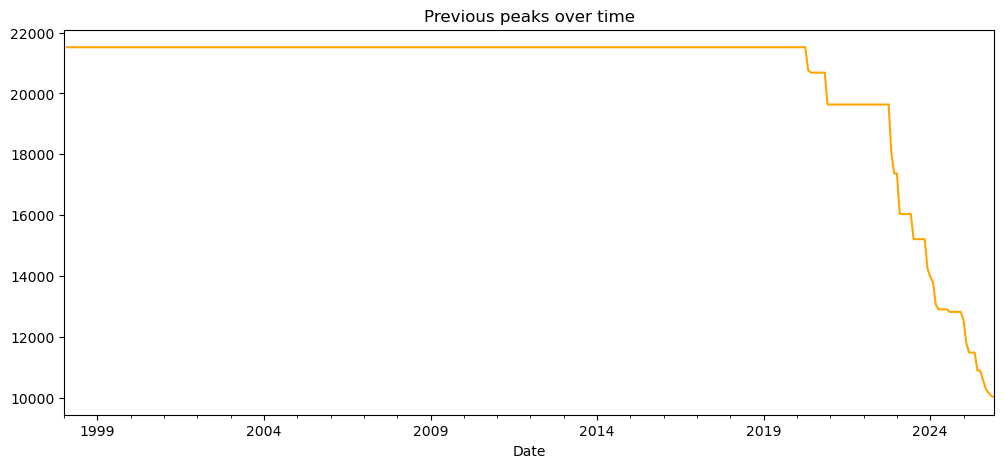

In [320]:
previous_peaks.plot.line(title="Previous peaks over time", color="orange", figsize=(12,5))

#### And Finally we can compute drawdown:

In [321]:
drawdown= (wealth_index-previous_peaks)/previous_peaks
drawdown

Date
2025-12-01    0.000000
2025-11-01    0.000000
2025-10-01    0.000000
2025-09-01    0.000000
2025-08-01    0.000000
                ...   
1998-05-01   -0.826219
1998-04-01   -0.835667
1998-03-01   -0.807112
1998-02-01   -0.800400
1998-01-01         NaN
Name: Return, Length: 336, dtype: float64

<Axes: title={'center': 'Drawdown over Time'}, xlabel='Date'>

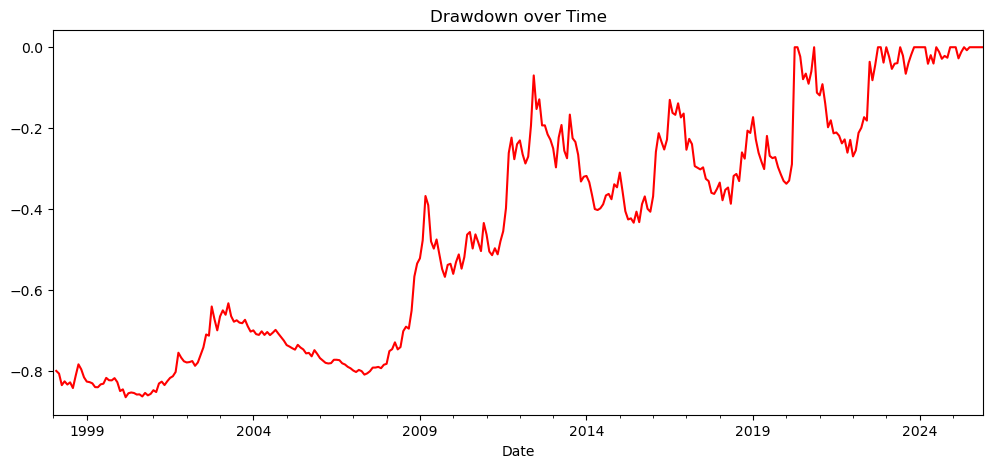

In [322]:
drawdown.plot.line(title="Drawdown over Time",color="red", figsize=(12,5))

To see when whe had it and what was the maximum and minimum drawdown, we do the same thing that we did with the returns

In [323]:
print('The maximum drowdown was ',drawdown.min()," and it was on ", drawdown.idxmin())

print('The minimum drowdown was ', drawdown.max()," and it was on ", drawdown.idxmax())

The maximum drowdown was  -0.865515905999702  and it was on  2000-03-01 00:00:00
The minimum drowdown was  0.0  and it was on  2025-12-01 00:00:00


So, with the drawdown we have found out
- A maximum drowdown of -86.55% on ***March 2000*** and a minimum of 0% for the last few dates available

#### To finish this section, to have a comprehensive overview, let's plot our wealth index and the previous peaks togheter:

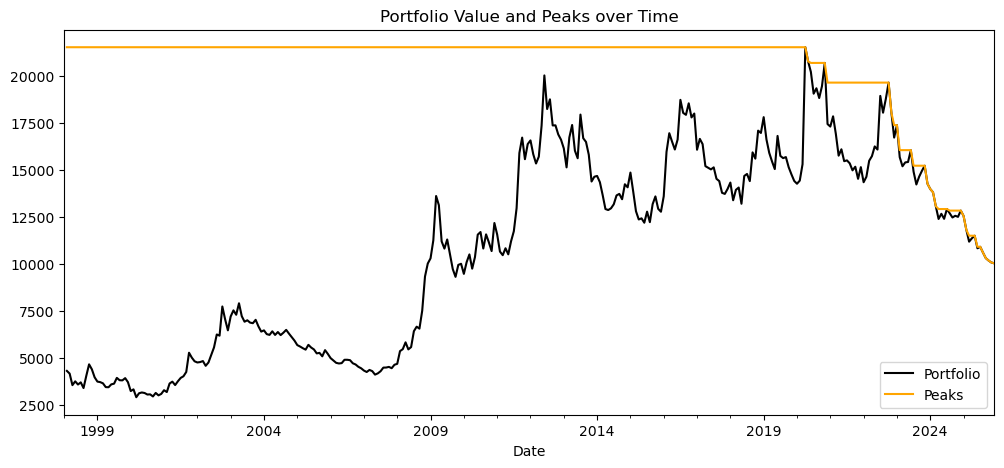

In [324]:
wealth_index.plot(title="Portfolio Value and Peaks over Time", color="black",label="Portfolio", figsize=(12,5))
previous_peaks.plot.line(color="orange",label="Peaks")
plt.legend()

# 4) Deviations of returns from normality: Skewness, Kurtosis

#### _Skewness_ $$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

In [325]:
r=prices['Return']
r_minus_E= r - r.mean()
sigma_r = r.std(ddof=0) # We use the population standard deviation, so we set ddof=0
e = (r_minus_E**3).mean()
skewness=e/sigma_r**3
print("The skewness of our returns is --> ", skewness)

The skewness of our returns is -->  -0.6989014069365572


 We have found a **skewness** of the returns of **_-0,699_** which tells us that the data in question is **moderately skewed to the left** (a normal distribution has a skewness of 1) and this, more importanlty tells us that in the FTSEMIB **_the potential for large, negative returns is greater than the potential for large, positive returns_** once again proving the risk associated with this index.

#### _Kurtosis_ $$ S(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

In [326]:
r=prices['Return']
r_minus_E= r - r.mean()
sigma_r = r.std(ddof=0) # use the population standard deviation, so set ddof=0
e = (r_minus_E**4).mean()
kurtosis=e/sigma_r**4
print("The kurtosis of our returns is --> ", kurtosis)

The kurtosis of our returns is -->  5.071700310972581


We have found a **kurtosis** of the returns of **_5,072_** which tells us that ***FSEMIB returns have an excess kurtosis of 2,07***. (A normal distribution has a kurtosis of 3,0).

This excess, more importanlty tells us that in the FTSEMIB the **distribution of returns has fatter tails and a more peaked center** than a normal distribution and all of this translates in **a higher probability of extreme outcomes, both very positive and very negative, than the normal distribution of returns** adding to the confirmation that we had with the skewness about the risk associated with this index.

#### Quick graph to have a comparison between the monthly returns that we have found at the start, and the normal distribution:

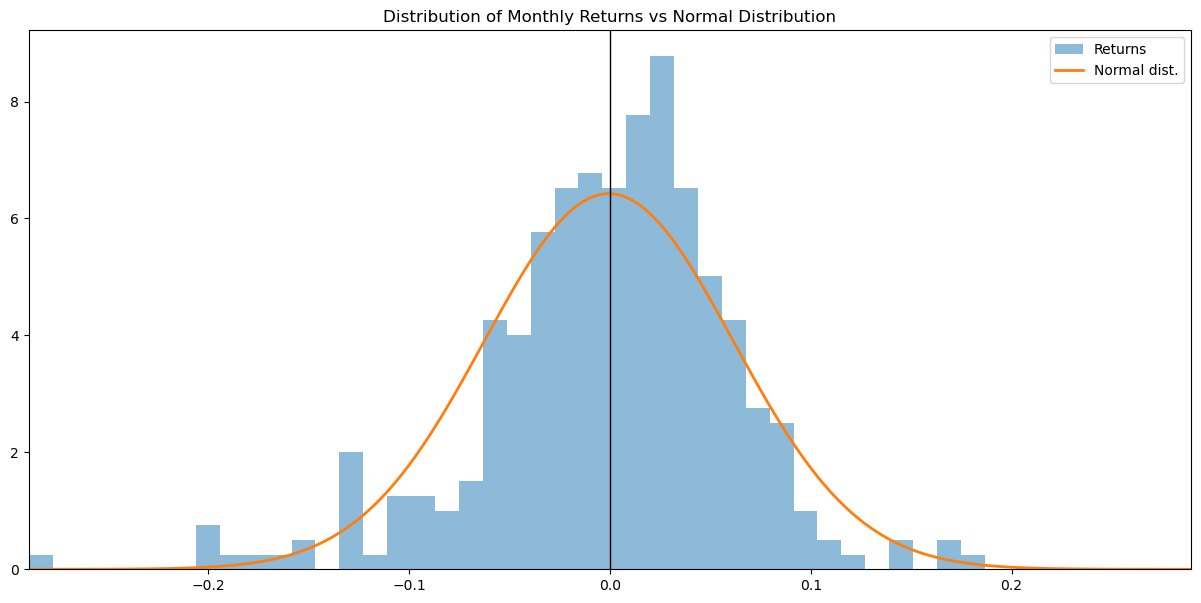

In [327]:
ret = prices['Return'].dropna()
mu = ret.mean()
sigma = ret.std()
max_abs = np.abs(ret).max()
x = np.linspace(-max_abs, max_abs, 200) # symmetric range around 0

plt.figure(figsize=(15,7))
plt.hist(ret, bins=40, density=True, alpha=0.5, label='Returns') # histogram of the returns
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth=2, label='Normal dist.') #this is the gaussian curve

plt.axvline(0, color='black', linewidth=1) # a vertical line at x= 0 to show the results
plt.title("Distribution of Monthly Returns vs Normal Distribution")
plt.xlim(-max_abs, max_abs) # force symmetric axis to center 0
plt.legend()
plt.show()


# 5) Downside Measures: Semideviation, Sortino Ratio, Historic Var, Gaussian Var, Modified Cornish-Fisher VaR

Modified Cornish-Fisher VaR:

A sophisticated parametric method that adjusts the Gaussian VaR formula by incorporating the calculated Skewness and Kurtosis values to provide a much more accurate estimate of VaR for non-normal distributions.

#### _Semideviation_

#### $$\sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_i \le \bar{R}} (R_i - \bar{R})^2}$$
Where:
- $N$ Number of observations
- $R_i$: Individual return, i-th return at a specific point in time $i$
- $\bar{R}$ : Mean return
- $(R_i - \bar{R})^2$: squared deviation from the mean of the returns
- $R_i \le \bar{R}$: Filter for the summation to restrict it to include only those returns ($R_i$) that are less than or equal to the mean return

##### The Semi-deviation gives us the volatility of the sub-sample of below average (or below zero) returns and it tells us how large and how frequent the negative deviations are

In [328]:
#Let's start
dmr=prices['Return']- prices['Return'].mean()    # We subtract the mean from the returns ---> dmr= demeaned r
dmr_negative = dmr[dmr<0]                        # We take only the returns below the mean
dmr_negative_square = dmr_negative**2            # We square the demeaned returns below the mean
n_negative = (dmr<0).sum()                       # number of returns under the mean
semideviation=dmr_negative_square.sum()/n_negative**0.5
print("The semideviation of FTSEMIB is ", semideviation)


The semideviation of FTSEMIB is  0.060980641035775884


 We have found a **semi-deviation** of the returns of FTSEMIB of ***6.1%*** , meaning an average risk for downside at any given point of ***6.1%***

#### _Sortino Ratio_

#### $$\text{Sortino Ratio} = \frac{\bar{R} - R_f}{\sigma_{semi}}$$
##### The Sortino Ratio gives us a measure of how much return an investment generates per unit of downside risk, accounting for the risk-free rate.

In [329]:
sortino_ratio= (prices['Return'].mean() - risk_free_rate)/semideviation
print("The Sortino Ratio is ",sortino_ratio)

The Sortino Ratio is  -0.616367701873908


We have found a **Sortino Ratio** of the returns of ***-0.62*** meaning that the actual returns failed to surpass the risk free rate, ***even when only considering downside risk*** 
(As opposed to the sharpe ratio, which considers the total volatilitiy, not just the one for negative returns).

#### _Historic Var_

In [330]:
nareturns=returns.dropna() #we create a series without na values
historic_var = -np.percentile(nareturns, 5) #we calculate the return of the 5% percentile, - because it will be negative
print("The Historic Var for the FTSEMIB is ",historic_var)

The Historic Var for the FTSEMIB is  0.11579545830772142


We have found an **Historic monthly VaR** of the returns of ***11.58%*** meaning that if you had invested in FTSEMIB, there would have been a **5% probability of the index losing 11% or more in one single period**.

#### _Gaussian Var_

$$VaR_α=−(μ+z_ασ)$$

In [331]:
from scipy.stats import norm
nareturns = returns.dropna()
mu = nareturns.mean() #mean
sigma = nareturns.std() #standard deviation
z = norm.ppf(0.05)  #we search the z score for the 5% confidence level
print("μ= ",mu)
print("σ= ",sigma)
print("Confidence level 5%")
print("Z score -> ",z)

gaussian_var = -(mu + z * sigma) # gaussian var equation
print("The Gaussian VaR of FTSEMIB is ", gaussian_var)

μ=  Return   -0.000522
dtype: float64
σ=  Return    0.062093
dtype: float64
Confidence level 5%
Z score ->  -1.6448536269514729
The Gaussian VaR of FTSEMIB is  Return    0.102656
dtype: float64


We have found a ***Gaussian VaR*** of ***10,27%*** this tells us that assuming returns follow a normal distribution, **there is a 5% probability of losing 10.26% or more in one single period**.

#### _Modified Cornish-Fisher VaR_

#### $$ \tilde{z}_{\alpha} = z_{\alpha} + \frac{1}{6}(z_{\alpha}^2 - 1)S + \frac{1}{24}(z_{\alpha}^3 - 3z_{\alpha})(K - 3) - \frac{1}{36}(2z_{\alpha}^3 - 5z_{\alpha})S^2 $$
The Modified Cornish-Fisher VaR adjusts the z score based on the real values of the skewness and kurtosis distributions of our FTSEMIB returns and thus it is not based on the normal distribution default values.

In [337]:
#We set into the equation our previously found values of the skewness and kurtosis
s = skewness 
k = kurtosis
z = (z +(z**2 - 1)*s/6 +(z**3 - 3*z)*(k-3)/24 -(2*z**3 - 5*z)*s**2/36) 
from scipy.stats import norm #just in case i forget to execute the previous box
nareturns = returns.dropna()
cornish_fisher_var=-(nareturns.mean() + z*r.std(ddof=0))
print("The Modified Cornish-Fisher VaR is ",cornish_fisher_var )


The Modified Cornish-Fisher VaR is  Return    0.127538
dtype: float64


We have found a Cornish–Fisher VaR of ***11,17%*** meaning that **there is a 5% probability** (based on our parametric model adjusted for skewness and kurtosis) **of losing 11.17%in one period**

### Now that we have found this three measures of VaR, it's interesting to plot them in a bar chart to see their differences:

C:\Users\matte\AppData\Local\Temp\ipykernel_7696\113317209.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  values = [float(historic_var), float(gaussian_var), float(cornish_fisher_var)]  # We make everything a float to avoid errors


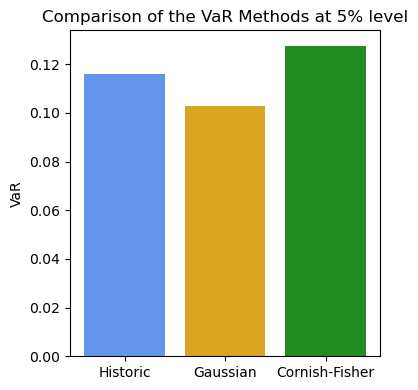

In [369]:
labels = ['Historic', 'Gaussian', 'Cornish-Fisher']
values = [float(historic_var), float(gaussian_var), float(cornish_fisher_var)]  # We make everything a float to avoid errors

plt.figure(figsize=(4,4))
plt.bar(labels, values, color=['cornflowerblue', 'goldenrod', 'forestgreen'])
plt.ylabel('VaR')
plt.title('Comparison of the VaR Methods at 5% level')
plt.tight_layout()
plt.show()

##### With this graph we can clearly see that the Cornish-Fisher method gives the highest 5% VaR, while the Gaussian method gives the lowest, this seems to be proportionally correlated with the precision used in the calculations.